## Week 6 Activity
### Q1

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
img = cv.imread('boat.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow('gray', gray)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
blur = cv.GaussianBlur(gray, (3, 3), 0)
AA, th = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

cv.imshow('Otsu threshold', th)
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
foreground_idx = cv.findNonZero(th)
foreground_idx_2D = foreground_idx.reshape(-1, 2)

coord_max = np.max(foreground_idx_2D, axis = 0)
coord_min = np.min(foreground_idx_2D, axis = 0)

cv.rectangle(img, (coord_min[0], coord_min[1]), (coord_max[0], coord_max[1]), (255, 0, 0), 2, 
            cv.LINE_AA)

cv.imshow('Otsu threshold', th)
cv.imshow('Bounding Box', img)
cv.waitKey(0)
cv.destroyAllWindows()

### Q2

In [8]:
img = cv.imread('leaf.jfif')

# Binary threshold
aa, processed_img = cv.threshold(img, 150, 250, cv.THRESH_BINARY)

cv.imshow('binary threshold',processed_img)
cv.waitKey(0)
cv.destroyAllWindows()

## Q3

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [12]:
img = cv.imread('porcelain1.jfif')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow('Porcelain1', img)
cv.waitKey(0)
cv.destroyAllWindows()

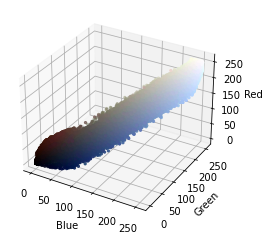

In [13]:
r, g, b = cv.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

pixel_colors = img.reshape((img.shape[0]*img.shape[1], 3))
norm = colors.Normalize(vmin = 0., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(b.flatten(), g.flatten(), r.flatten(), facecolors = pixel_colors,
            marker = ".")
axis.set_xlabel('Blue')
axis.set_ylabel('Green')
axis.set_zlabel('Red')
plt.show()

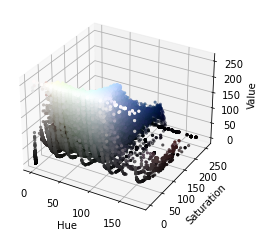

In [14]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors = pixel_colors,
            marker = ".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

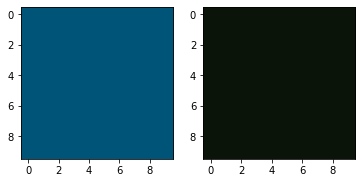

In [15]:
blue_low = (80, 130, 20)
blue_high = (140, 255, 120)

from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), blue_low, dtype = np.uint8)/255.0
do_square = np.full((10, 10, 3), blue_high, dtype = np.uint8)/255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

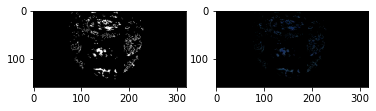

In [16]:
mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask = mask)

plt.subplot(1,2,1)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()

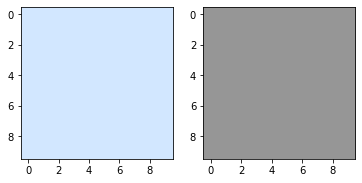

In [17]:
white_low = (0, 0, 150)
white_high = (150, 45, 255)

lo_square = np.full((10, 10, 3), white_low, dtype = np.uint8)/255.0
do_square = np.full((10, 10, 3), white_high, dtype = np.uint8)/255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

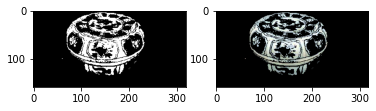

In [18]:
mask_white = cv.inRange(img_hsv, white_low, white_high)
res_white = cv.bitwise_and(img, img, mask = mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap = "gray")
plt.subplot(1, 2, 2)
plt.imshow(res_white)
plt.show()

In [19]:
final_mask = cv.add(mask, mask_white)

In [21]:
# Create a custom function
def segment_porcelain(img):
    """Image segmentation based on HSV color space to segregate
    blue and white regions from the provided argument img.
    img should be in RGB format.
    """
    # Convert image to HSV
    hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

    # Set the blue color range in HSV color space
    blue_low = (80, 130, 20)
    blue_high = (140, 255, 120)

    # Create blue mask
    mask_blue = cv.inRange(hsv, blue_low, blue_high)

    # Set the white color range in HSV color space
    white_low = (0, 0, 150)
    white_high = (150, 45, 255)

    # Create white mask
    mask_white = cv.inRange(hsv, white_low, white_high)

    # AND operation to get the segmented blue region
    mask = cv.add(mask_blue, mask_white)
    res = cv.bitwise_and(img, img, mask = mask)

    # clean up the segmentation using blur filter
    blur = cv.GaussianBlur(res, (5, 5), 0)
    return blur
    
filename = "porcelain"

porcelain_list = []
for i in range(1,6):
    porcelain = cv.cvtColor(cv.imread(filename + str(i) + ".jfif"),
                           cv.COLOR_BGR2RGB)
    porcelain_list.append(porcelain)

results = [segment_porcelain(porcelain) for porcelain in porcelain_list]

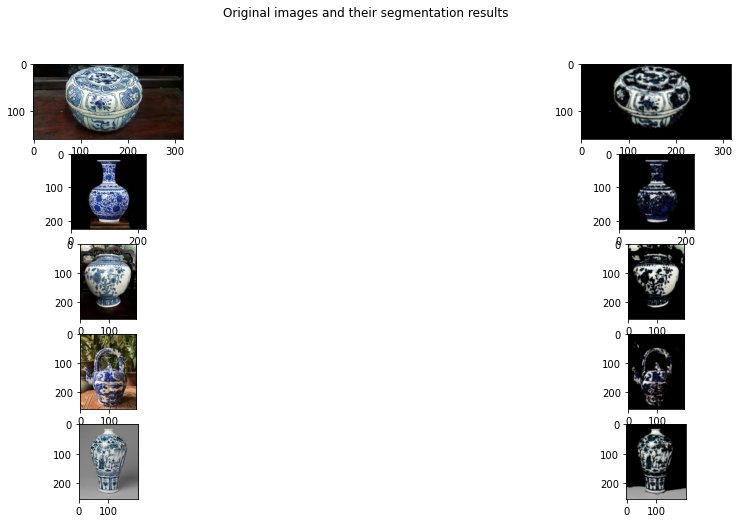

In [22]:
f, ax = plt.subplots(5,2, figsize = (18, 8))

for i in range(5):
    ax[i][0].imshow(porcelain_list[i])
    ax[i][1].imshow(results[i])
    
f.suptitle('Original images and their segmentation results')
plt.show()